<h1>Analyse Exploratoire des Données</h1> 

<h4> Les membres de projet : </h4>
<ul>
<li>Ouhmida Soulaimane </li>
<li>Targui Hajar </li>
<li>Kelladi Fatima ezzahra </li>
<li>Takkaddoumi Hamza </li>
</ul>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns



In [9]:
dataSet = pd.read_csv('./Documents/netflix.csv')

In [10]:
dataSet.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


this is to see if there are null columns

In [32]:
dataSet.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

this is to check if the data is duplicated (it shows only the duplicated data)

In [33]:
dataSet.loc[dataSet.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [34]:
dataSet.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [35]:
categorielist=[]
for categories in dataSet['listed_in'].str.split(','):
    for cat in categories:
        categorielist.append(cat)
category_counts = pd.Series(categorielist).value_counts()
print(categorielist)
top_categories = category_counts.head(5)
print(top_categories)


['Documentaries', 'International TV Shows', ' TV Dramas', ' TV Mysteries', 'Crime TV Shows', ' International TV Shows', ' TV Action & Adventure', 'Docuseries', ' Reality TV', 'International TV Shows', ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror', ' TV Mysteries', 'Children & Family Movies', 'Dramas', ' Independent Movies', ' International Movies', 'British TV Shows', ' Reality TV', 'Comedies', ' Dramas', 'Crime TV Shows', ' Docuseries', ' International TV Shows', 'Crime TV Shows', ' International TV Shows', ' TV Action & Adventure', 'Dramas', ' International Movies', 'Children & Family Movies', ' Comedies', 'British TV Shows', ' Crime TV Shows', ' Docuseries', 'TV Comedies', ' TV Dramas', 'Documentaries', ' International Movies', 'Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas', 'Thrillers', 'International TV Shows', ' Spanish-Language TV Shows', ' TV Action & Adventure', 'Crime TV Shows', ' Docuseries', ' International TV Shows', 'International TV Shows'

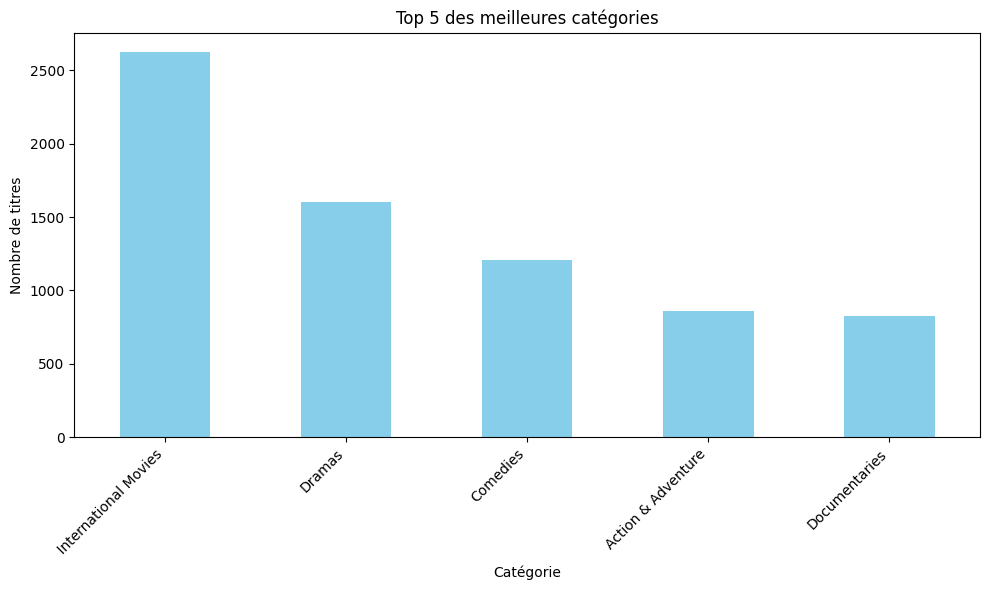

In [36]:
# Création du graphique
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 des meilleures catégories')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de titres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
topdirector=dataSet['director'].dropna().value_counts().head(5)
print(topdirector)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: count, dtype: int64


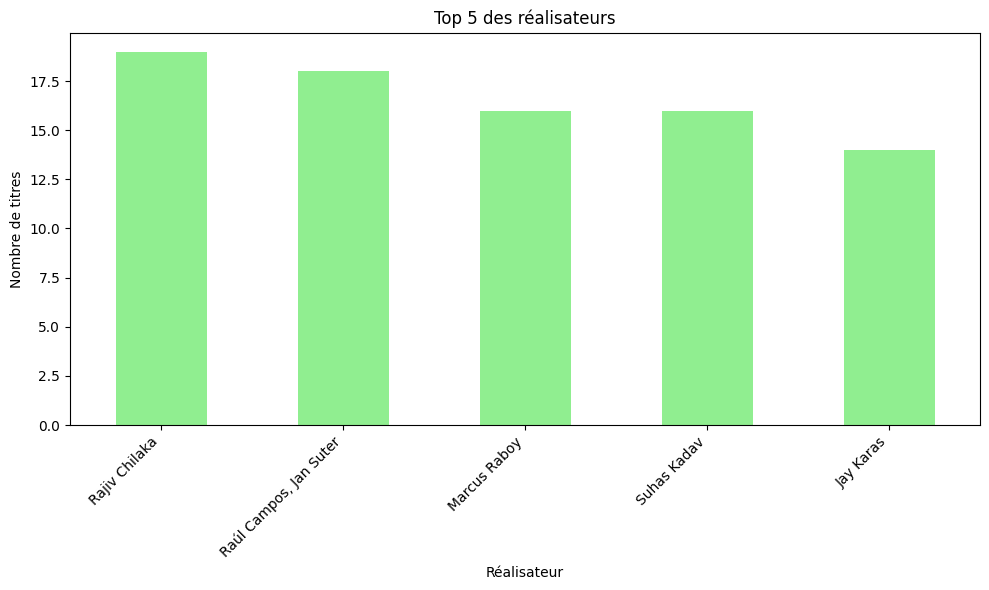

In [38]:

# Création du graphique
plt.figure(figsize=(10, 6))
topdirector.plot(kind='bar', color='lightgreen')
plt.title('Top 5 des réalisateurs')
plt.xlabel('Réalisateur')
plt.ylabel('Nombre de titres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
dataSet['cast'] = dataSet['cast'].fillna('Unknown')
castlist=[]
for casts in dataSet['cast'].str.split(','):
    for cast in casts:
        castlist.append(cast)
cast_counts = pd.Series(castlist).value_counts()
top_casts = cast_counts.head(11)
top_casts=top_casts.tail(10)
print(top_casts)



 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Shah Rukh Khan       26
 Rajesh Kava         26
 Andrea Libman       25
 Paresh Rawal        25
 Boman Irani         25
Name: count, dtype: int64


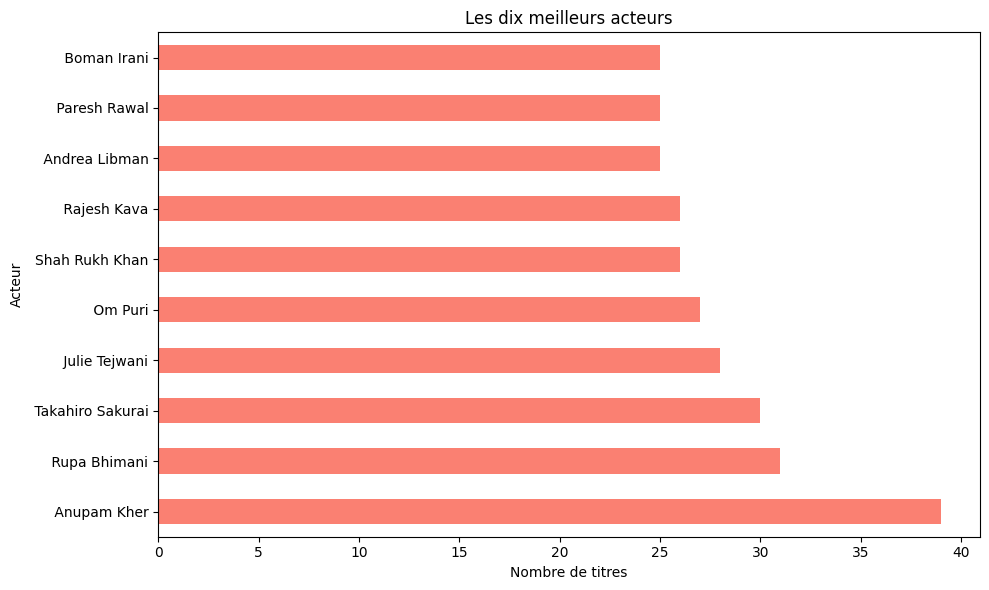

In [40]:
# Création du graphique
plt.figure(figsize=(10, 6))
top_casts.plot(kind='barh', color='salmon')
plt.title('Les dix meilleurs acteurs')
plt.xlabel('Nombre de titres')
plt.ylabel('Acteur')
plt.tight_layout()
plt.show()

In [41]:
tv_shows=dataSet[dataSet['type']=='TV Show']
sorted=tv_shows.sort_values(by='duration', ascending=False).head(5)
sorted=sorted.loc[:, ['title', 'duration']]
sorted.head()


,title,duration
1480,Still Game,9 Seasons
6504,Club Friday The Series 6,9 Seasons
67,Saved by the Bell,9 Seasons
1998,Call the Midwife,9 Seasons
8,The Great British Baking Show,9 Seasons


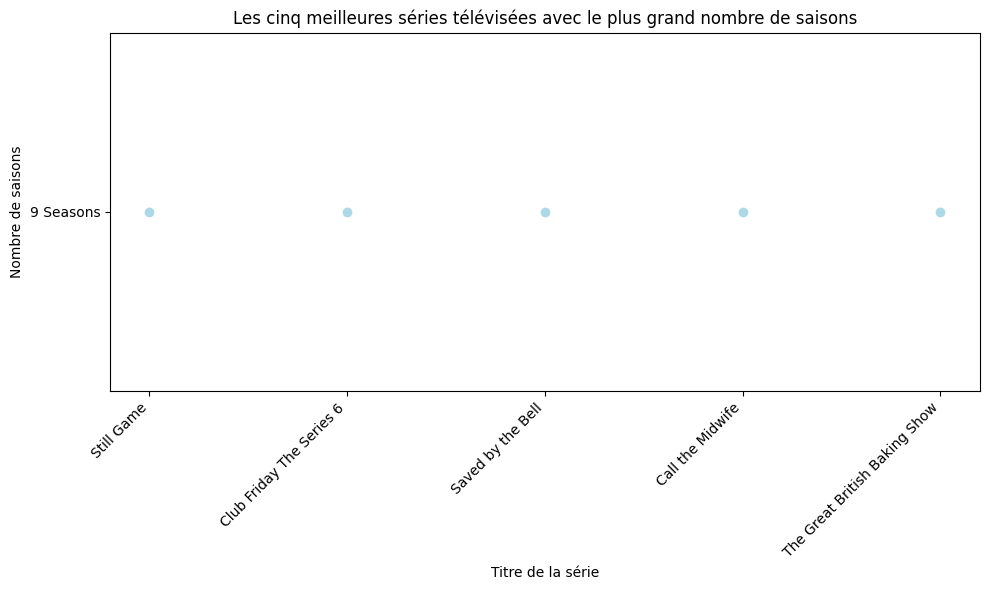

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(sorted['title'], sorted['duration'], color='lightblue')
plt.xlabel('Titre de la série')
plt.ylabel('Nombre de saisons')
plt.title('Les cinq meilleures séries télévisées avec le plus grand nombre de saisons')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

In [43]:
# Filtrer les films et les séries télévisées
movies = dataSet[dataSet['type'] == 'Movie']
tv_shows = dataSet[dataSet['type'] == 'TV Show']

# Grouper les films par année de sortie
movies_by_year = movies.groupby('release_year').size()

# Grouper les séries télévisées par année de sortie
tv_shows_by_year = tv_shows.groupby('release_year').size()

# Fusionner les données dans un seul DataFrame
data = pd.concat([movies_by_year, tv_shows_by_year], axis=1)
data.columns = ['Movies', 'TV Shows']
last3years=data.sort_values(by='release_year', ascending=False).head(5)
print(last3years)




              Movies  TV Shows
release_year                  
2021           277.0     315.0
2020           517.0     436.0
2019           633.0     397.0
2018           767.0     380.0
2017           767.0     265.0


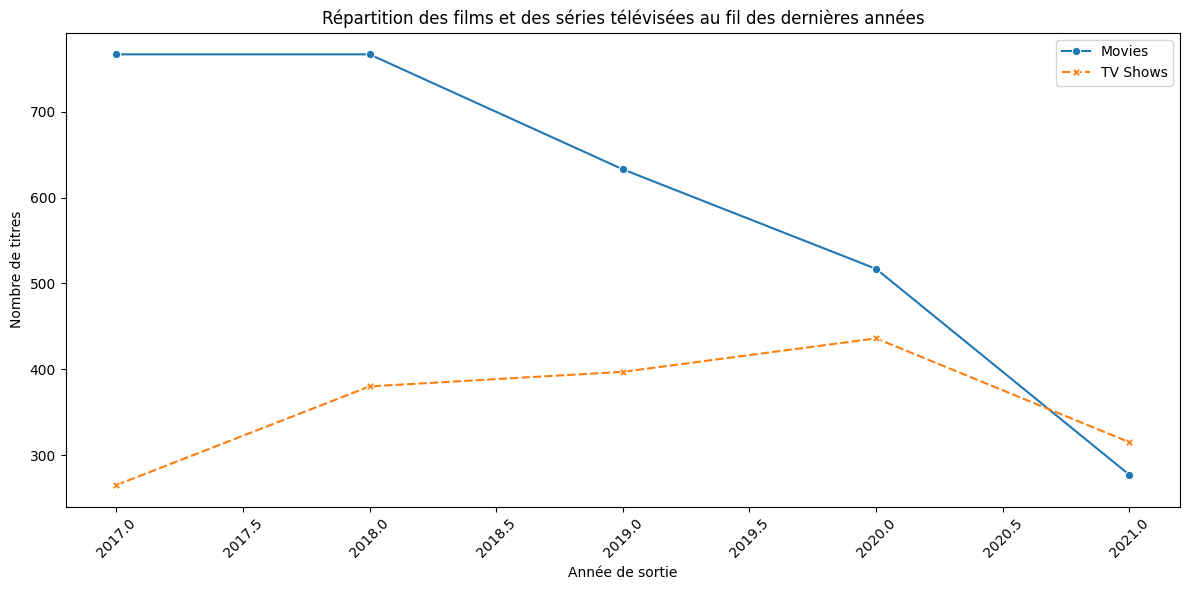

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=last3years, markers=True)
plt.title('Répartition des films et des séries télévisées au fil des dernières années')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de titres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()